#  Iris Data Set 
http://archive.ics.uci.edu/ml/datasets/Iris

### Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [5]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets

In [79]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(iris.data)
df[4] = y

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
#parametri che voglio testare tramite ricerca esaustiva con GridSearchCV 
params = {
    'hidden_layer_sizes': [(10,2), (10), (5,5), (20,10)],
    'learning_rate_init' : [0.5, 0.2, 0.1, 0.01,]
}

#MLP di partenza
mlp = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=500, learning_rate='adaptive')

#testo i diversi parametri con 5-fold cross validation 
clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)
clf.fit(X, y)

print("Best estimator: ", clf.best_estimator_)

#testo come funziona il migliore stimatore trovato con 5-fold cross validation
nn = clf.best_estimator_
scores = cross_val_score(nn, X, y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Best estimator:  MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Accuracy: 0.97 (+/- 0.07)


/home/cappa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

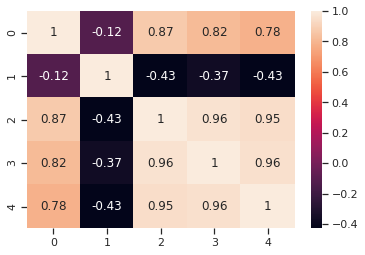

In [82]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [83]:
df.columns = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)', 'type']

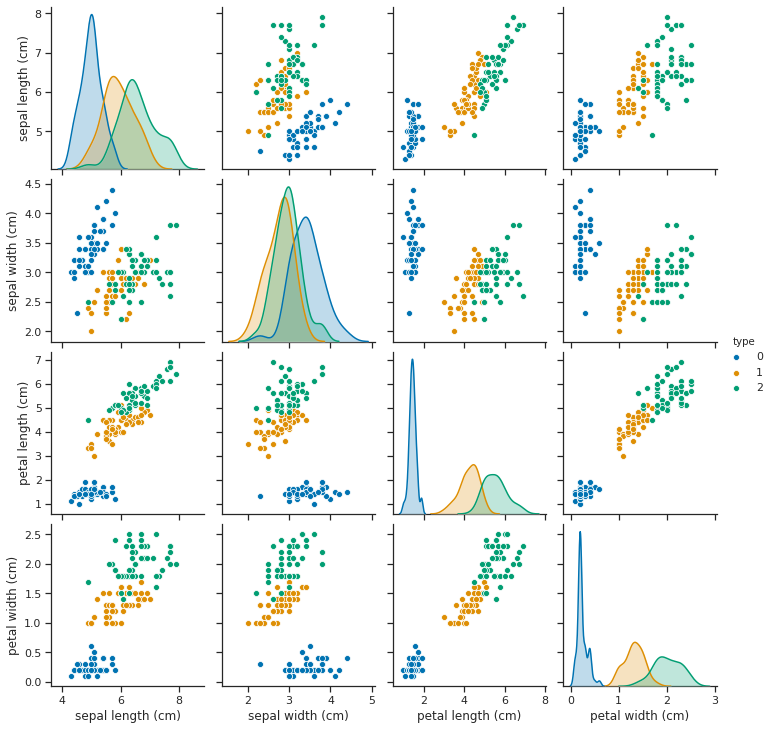

In [86]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
 
# Basic correlogram
# hue=4
sns.pairplot(df, palette="colorblind", diag_kind="kde", hue='type')
plt.show()

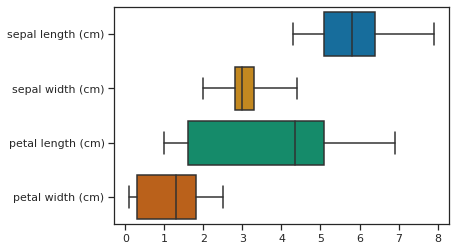

In [94]:
sns.boxplot(data=df.iloc[:,:-1], palette='colorblind', orient='h', whis='range')
plt.show()

In [8]:
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [9]:
def scatter(x, labels):
    palette = np.array(sns.color_palette("colorblind", 3))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    sc = ax.scatter(x[:,0], x[:,1], c=palette[list(labels)], alpha=0.7)
    
    ax.axis('off')

    txts = []
    for i in range(3):
        # Ogni label viene posta nella mediana dei punti corrispondenti.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(iris.target_names[i]), fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f, ax, sc, txts

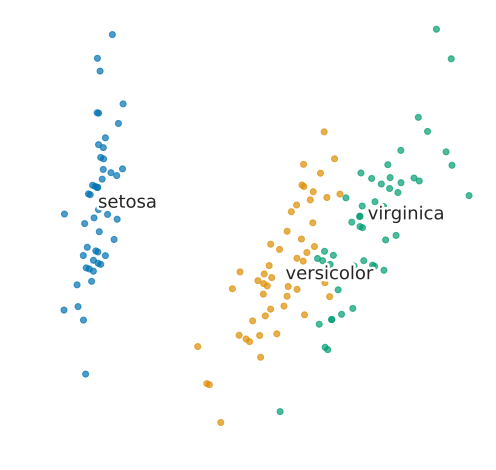

In [10]:
fig_pca, ax_pca, _, _ = scatter(X_pca, y.astype(int))
plt.show()

In [11]:
from sklearn.manifold import TSNE

X_tsne = TSNE().fit_transform(X)

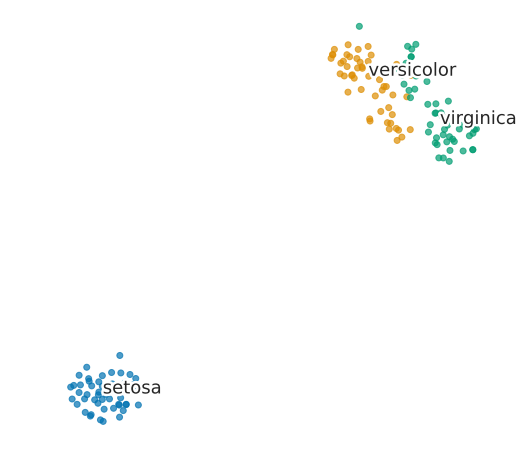

In [12]:
fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y.astype(int))
plt.show()